In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [55]:
df=pd.read_csv("/content/drive/MyDrive/멀캠 1st semiproject/개인 프로젝트 작업 파일/스타벅스 데이터를 이용한 아파트 가격 예측/0510최종합본.csv")
df

,Unnamed: 0,주소,단지명,전용면적(㎡),계약년월,계약일,보증금(만원),층,건축년도,도로명,...,폭력 검거율,총인구(십만명),인구 십만명당 살인발생,인구 십만명당 강도발생,"인구 십만명당 강간,추행발생",인구 십만명당 절도발생,인구 십만명당 폭력발생,park,han_park,center_weight
0,0,서울특별시 강남구 개포동 655-2,개포2차현대아파트(220),77.75,201501,13,"40,000",5,1988,언주로 103,...,0.86,51.0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
1,1,서울특별시 강남구 개포동 655-2,개포2차현대아파트(220),77.75,201503,2,"50,000",2,1988,언주로 103,...,0.86,51.0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
2,2,서울특별시 강남구 개포동 655-2,개포2차현대아파트(220),77.75,201505,23,"50,000",6,1988,언주로 103,...,0.86,51.0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
3,3,서울특별시 강남구 개포동 655-2,개포2차현대아파트(220),77.75,201506,8,"49,000",3,1988,언주로 103,...,0.86,51.0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
4,4,서울특별시 강남구 개포동 655-2,개포2차현대아파트(220),77.75,201507,22,"50,000",9,1988,언주로 103,...,0.86,51.0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521277,521277,서울특별시 은평구 대조동 179-16,북한산포레스트,29.02,202108,2,"33,500",10,2021,서오릉로 80-1,...,0.88,46.0,0.108696,0.101522,4.003696,33.264565,49.438478,0,0,7.361963
521278,521278,서울특별시 은평구 대조동 179-16,북한산포레스트,29.02,202108,20,"33,500",8,2021,서오릉로 80-1,...,0.88,46.0,0.108696,0.101522,4.003696,33.264565,49.438478,0,0,7.361963
521279,521279,서울특별시 은평구 대조동 179-16,북한산포레스트,29.02,202109,18,"33,500",8,2021,서오릉로 80-1,...,0.88,46.0,0.108696,0.101522,4.003696,33.264565,49.438478,0,0,7.361963
521280,521280,서울특별시 은평구 대조동 179-16,북한산포레스트,29.02,202110,29,"33,500",8,2021,서오릉로 80-1,...,0.88,46.0,0.108696,0.101522,4.003696,33.264565,49.438478,0,0,7.361963


In [ ]:
df.columns

Index(['Unnamed: 0', '주소', '단지명', '전용면적(㎡)', '계약년월', '계약일', '보증금(만원)', '층',
       '건축년도', '도로명', 'latitude', 'longitude', 'home_cnt', 'home_size',
       'room_cnt', 'bath_cnt', 'edu', 'bus', 'sub_dist', '1호선', '2호선', '3호선',
       '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '구', '총인구', '살인 발생', '살인 검거',
       '살인 검거율', '강도 발생', '강도 검거', '강도 검거율', '강간,추행 발생', '강간,추행 검거',
       '강간,추행 검거율', '절도 발생', '절도 검거', '절도 검거율', '폭력 발생', '폭력 검거', '폭력 검거율',
       '총인구(십만명)', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'park', 'han_park', 'center_weight'],
      dtype='object')

In [ ]:
df_drop=df[[ '보증금(만원)', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt', 'edu', 'bus', 'sub_dist', '1호선', '2호선', '3호선',
       '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'park', 'han_park', 'center_weight']]

In [ ]:
df_drop['보증금(만원)']=df_drop['보증금(만원)'].str.replace(",", "")
df_drop=df_drop.astype({'보증금(만원)' : 'float'})
df_drop.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,보증금(만원),전용면적(㎡),계약년월,계약일,층,건축년도,home_cnt,home_size,room_cnt,bath_cnt,...,8호선,9호선,인구 십만명당 살인발생,인구 십만명당 강도발생,"인구 십만명당 강간,추행발생",인구 십만명당 절도발생,인구 십만명당 폭력발생,park,han_park,center_weight
0,40000.0,77.75,201501,13,5,1988,54,77.75,3,1,...,0,0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
1,50000.0,77.75,201503,2,2,1988,54,77.75,3,1,...,0,0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
2,50000.0,77.75,201505,23,6,1988,54,77.75,3,1,...,0,0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
3,49000.0,77.75,201506,8,3,1988,54,77.75,3,1,...,0,0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307
4,50000.0,77.75,201507,22,9,1988,54,77.75,3,1,...,0,0,0.150392,0.369216,11.588235,63.699412,76.673137,0,0,10.658307


In [ ]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor()


X=df_drop[[ '전용면적(㎡)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt', 'edu', 'bus', 'sub_dist', '1호선', '2호선', '3호선',
       '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'park', 'han_park', 'center_weight']].values
y=df_drop['보증금(만원)'].values

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.2, random_state=2022
)

In [ ]:
evals=[(X_test, y_test)] 
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss')

[1]	valid_0's l2: 6.16918e+08
[2]	valid_0's l2: 5.41832e+08
[3]	valid_0's l2: 4.80147e+08
[4]	valid_0's l2: 4.29766e+08
[5]	valid_0's l2: 3.87516e+08
[6]	valid_0's l2: 3.50921e+08
[7]	valid_0's l2: 3.21673e+08
[8]	valid_0's l2: 2.96119e+08
[9]	valid_0's l2: 2.74454e+08
[10]	valid_0's l2: 2.5709e+08
[11]	valid_0's l2: 2.4165e+08
[12]	valid_0's l2: 2.28515e+08
[13]	valid_0's l2: 2.17348e+08
[14]	valid_0's l2: 2.07685e+08
[15]	valid_0's l2: 1.99281e+08
[16]	valid_0's l2: 1.92258e+08
[17]	valid_0's l2: 1.8563e+08
[18]	valid_0's l2: 1.80345e+08
[19]	valid_0's l2: 1.75724e+08
[20]	valid_0's l2: 1.71538e+08
[21]	valid_0's l2: 1.67924e+08
[22]	valid_0's l2: 1.64625e+08
[23]	valid_0's l2: 1.61741e+08
[24]	valid_0's l2: 1.5928e+08
[25]	valid_0's l2: 1.57207e+08
[26]	valid_0's l2: 1.55228e+08
[27]	valid_0's l2: 1.53267e+08
[28]	valid_0's l2: 1.51446e+08
[29]	valid_0's l2: 1.49969e+08
[30]	valid_0's l2: 1.48508e+08
[31]	valid_0's l2: 1.47501e+08
[32]	valid_0's l2: 1.46486e+08
[33]	valid_0's l2: 1.

LGBMRegressor()

In [ ]:
lgb.score(X_test, y_test)

0.8241389121273135

In [ ]:
X=df_drop[[ '전용면적(㎡)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt', 'edu', 'bus', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'park', 'han_park']].values
y=df_drop['보증금(만원)'].values

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.2, random_state=2022
)
lgb2=LGBMRegressor()
evals=[(X_test, y_test)] 
lgb2.fit(X_train, y_train, eval_set=evals, eval_metric='logloss')
lgb2.score(X_test, y_test)

[1]	valid_0's l2: 6.18776e+08
[2]	valid_0's l2: 5.44489e+08
[3]	valid_0's l2: 4.84534e+08
[4]	valid_0's l2: 4.34411e+08
[5]	valid_0's l2: 3.92582e+08
[6]	valid_0's l2: 3.57079e+08
[7]	valid_0's l2: 3.26935e+08
[8]	valid_0's l2: 3.02919e+08
[9]	valid_0's l2: 2.82596e+08
[10]	valid_0's l2: 2.64711e+08
[11]	valid_0's l2: 2.49723e+08
[12]	valid_0's l2: 2.37696e+08
[13]	valid_0's l2: 2.26851e+08
[14]	valid_0's l2: 2.17474e+08
[15]	valid_0's l2: 2.09641e+08
[16]	valid_0's l2: 2.02807e+08
[17]	valid_0's l2: 1.96471e+08
[18]	valid_0's l2: 1.91443e+08
[19]	valid_0's l2: 1.86708e+08
[20]	valid_0's l2: 1.82941e+08
[21]	valid_0's l2: 1.79351e+08
[22]	valid_0's l2: 1.76062e+08
[23]	valid_0's l2: 1.73061e+08
[24]	valid_0's l2: 1.70545e+08
[25]	valid_0's l2: 1.68346e+08
[26]	valid_0's l2: 1.66294e+08
[27]	valid_0's l2: 1.64332e+08
[28]	valid_0's l2: 1.62766e+08
[29]	valid_0's l2: 1.61161e+08
[30]	valid_0's l2: 1.59697e+08
[31]	valid_0's l2: 1.58609e+08
[32]	valid_0's l2: 1.57125e+08
[33]	valid_0's l2

0.812851859857936

[]

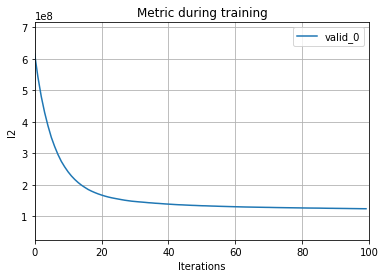

In [ ]:
from lightgbm import plot_metric, plot_importance, plot_tree

plot_metric(lgb)
plt.plot()

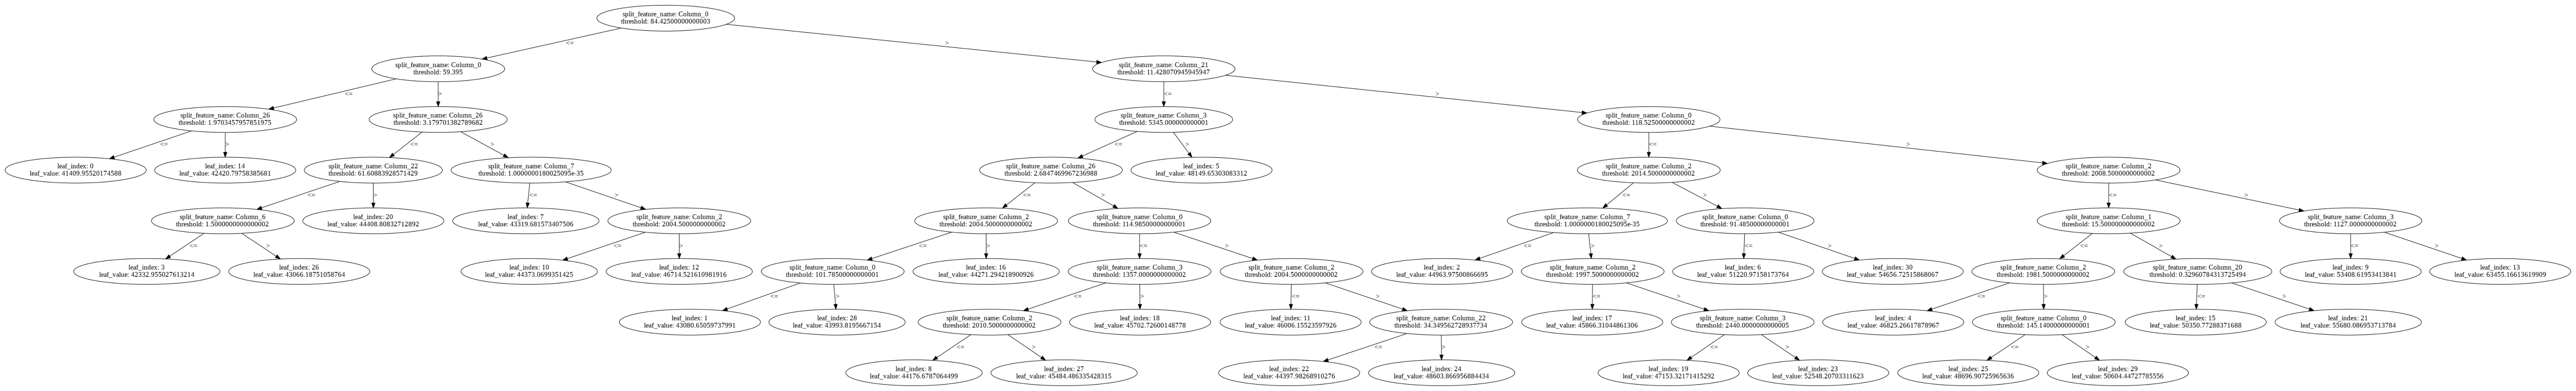

In [ ]:
plot_tree(lgb, figsize=(100,100));